## Import dependencies
- pandas
- numpy
- matplotlib
- scipy
- scikit-learn
- fastcluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from fastcluster import linkage
from matplotlib.colors import ListedColormap
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Create merch dictionary to map merch number and merch name

In [2]:
def read_main(main_path):  
    merch = {}
    main_data = pd.read_csv(main_path, sep="\t")
    for x in range(main_data.shape[0]):
        merch[main_data.iloc[x]["商品代號"]] = main_data.iloc[x]["商品名稱"]
    print(len(merch))
    return merch
merch = read_main('../data/main.txt')

4535


## Create whole_sales matrix from csv

In [3]:
whole_sales = pd.read_csv('../data/銷售數量2017_transformed.csv', sep=",")

## Compute vec_angles as similarity matrix

In [4]:
def to_vec_angles(whole_sales):
    data = whole_sales.to_numpy()[:,2:]
    data_trans = data.T
    print("data shape:", data.shape)
    data_length = np.sqrt(np.sum(data**2, axis=1)).reshape((8382,1))
    data_lengths = np.dot(data_length, data_length.T)
    vec_angles = np.dot(data,data_trans)/data_lengths
    vec_angles = np.nan_to_num(vec_angles, posinf=0)
    for x in range(vec_angles.shape[0]):
        vec_angles[x,x] = 1.0
    return data, vec_angles
data, vec_angles = to_vec_angles(whole_sales)

data shape: (8382, 365)


In [5]:
print(np.where(vec_angles[5, :300]>0.8))

(array([ 4,  5, 27]),)


In [6]:
print(vec_angles[484,513])

0.8130172247603041


## Function for plotting two vectors

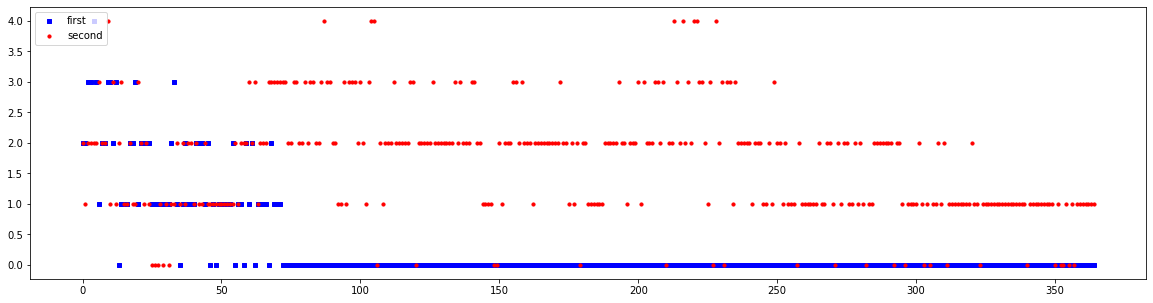

In [7]:
def plot_2vec(idx1, idx2):
    x = range(365)
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(111)
    ax1.scatter(x, data[idx1], s=10, c='b', marker="s", label='first')
    ax1.scatter(x, data[idx2], s=10, c='r', marker="o", label='second')
    plt.legend(loc='upper left');
    plt.show()
plot_2vec(5, 3)

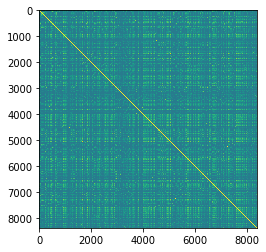

In [8]:
plt.imshow(vec_angles)

## Get similar merchs for each row

In [9]:
def get_similars(vec_angles, thres, data):
    similars = []
    for i in range(data.shape[0]):
        similars.append(np.where(vec_angles[i]>thres)[0])
    return similars
similars = get_similars(vec_angles, 0.8, data)

## Create dictionary for mapping row number to merch name

In [10]:
row2merch = {}
for s in similars:
    for row in s:
        row2merch[row] = merch[whole_sales.iloc[row]["商品代號"]]

In [24]:
def show_similars(similars):
    for s in range(len(similars)):
        print(s, end=' ')
        for row in similars[s]:
            print(row, row2merch[row], end=' ')
        print('\n')
show_similars(similars)

0 0 鮑菇脆筍飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 28 傳統香腸蛋飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 214 香蕉單入 479 巧克力派司 513 一配雪花蛋糕 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2084 墨西哥葡萄奶酥 2510 麥香紅茶ＴＰ３００ 3370 明太子龍蝦風味飯糰 4101 義美錫蘭紅茶 5054 壽喜燒牛肉飯糰 5074 明太子龍蝦風味飯糰 5095 肉鬆細卷 5096 鮪魚細卷 5100 一配龍蝦風味沙拉手卷 5800 統一陽光無糖高纖豆漿 5870 麥香紅茶ＴＰ３００ 5953 麥香奶茶ＴＰ３００ 6875 香蕉單入 7414 義美錫蘭紅茶 7508 義美古早傳統無糖豆奶 7512 義美無糖黑豆奶 

1 1 肉鬆飯糰 2 鮪魚飯糰 110 招牌火腿三明治 113 鮪魚雞蛋沙拉三明治 491 新感覺－花生夾心２入 538 藜麥土司 1666 肉鬆飯糰 1667 鮪魚飯糰 1768 招牌火腿三明治 2105 新感覺－花生夾心２入 3347 鮪魚飯糰 5049 肉鬆飯糰 5050 鮪魚飯糰 5149 招牌火腿三明治 5482 新感覺－草莓夾心２入 6670 肉鬆飯糰 6671 鮪魚飯糰 

2 1 肉鬆飯糰 2 鮪魚飯糰 110 招牌火腿三明治 113 鮪魚雞蛋沙拉三明治 491 新感覺－花生夾心２入 538 藜麥土司 1666 肉鬆飯糰 1667 鮪魚飯糰 1768 招牌火腿三明治 5049 肉鬆飯糰 5050 鮪魚飯糰 5149 招牌火腿三明治 6670 肉鬆飯糰 6671 鮪魚飯糰 6852 哈密瓜（截切） 

3 3 炭火烤雞飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 29 鮭魚鮭魚卵飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 114 燻火腿溏心蛋三明治 214 香蕉單入 1191 ＵＮＩ　ＷＡＴＥＲ３３０ 1691 明太子龍蝦風味飯糰 1712 肉鬆細卷 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2371 純喫茶綠茶６５０ｍｌ 2510 麥香紅茶ＴＰ３００ 2661 韋恩特濃咖啡 3081 （舊）七星１０毫克硬盒香煙 5074 明太子龍蝦風味飯糰 5096 鮪魚細卷 5100 一配龍蝦風味

130 130 咖哩雞起司捲餅（北區．中區） 

131 131 牛肉起司可頌（北．中區） 

132 132 多重起司火腿捲 

133 133 雙層牛肉起司堡 

134 134 德式燻腸肉醬捲 

135 135 蜂蜜芥末雞腿堡 

136 136 花生醬牛肉培根堡 

137 137 里肌起司可頌（北．中區） 8164 峰硬盒香煙 

138 138 黃金雞腿堡 

139 139 豬肉蛋堡 

140 140 泰式椒麻雞涼麵 

141 141 一番涼麵 

142 142 日式鰹露蕎麥風味涼麵 

143 143 超大滿足麻醬涼麵 

144 8 鮪魚飯糰 23 五目溏心蛋飯糰 144 大滿足麻醬涼麵 

145 145 大滿足川辣涼麵 

146 146 大滿足原味麻醬涼麵 

147 147 大滿足四川香麻涼麵 

148 148 日式和醋冷麵 

149 149 韓式泡菜冷麵 

150 150 日式烏龍冷麵 

151 151 川辣雞絲涼麵 

152 152 韓式泡菜豬肉冷麵 

153 153 經典雙醬炙燒雞排鐵板麵 3585 蘿蔓凱薩沙拉 

154 154 ＸＯ醬什錦海鮮炒麵 

155 155 沙茶牛肉炒麵 

156 156 雙醬烤雞鐵板麵 

157 157 紅油抄手麵 

158 158 日式炒烏龍 

159 159 炸醬麵 

160 160 紅燒牛肉麵 

161 161 長崎野菜叉燒拉麵 

162 162 札幌味噌叉燒拉麵 

163 163 九州豚骨叉燒拉麵 292 酸菜白肉鍋 

164 164 古早味排骨酥麵 

165 165 紅燒牛肉麵 

166 166 大蒜拳骨風味拉麵 

167 167 銀次郎風味魚豚拉麵 

168 168 野菜強棒風味拉麵 

169 169 經典奶油培根義大利麵 

170 170 經典蕃茄肉醬義大利麵 

171 171 海瓜子奶油青醬義大利麵 

172 172 多重起司烤雞焗烤麵 

173 173 辣味鮮魷墨魚醬義大利麵 

174 174 義式茄汁香腸義大利麵 

175 175 特濃奶油起司培根義大利麵 

176 176 義式蘑菇奶油烤雞義大利麵 

177 177 起司奶油培根義大利麵 

178 178 狠飽香腸肉醬義大利麵 2578 冷泡茶－茶王烏龍 

179

491 1 肉鬆飯糰 2 鮪魚飯糰 491 新感覺－花生夾心２入 538 藜麥土司 1667 鮪魚飯糰 5050 鮪魚飯糰 

492 8 鮪魚飯糰 120 招牌火腿三明治 492 全家花生夾心土司（２入） 1673 鮪魚飯糰 2106 全家花生夾心土司（２入） 5055 肉鬆飯糰 5056 鮪魚飯糰 

493 493 新感覺－草莓夾心２入 

494 494 番茄鮪魚小土司 

495 495 起司火腿肉鬆小土司 

496 496 全家草莓夾心土司（２入） 

497 497 一配金立方土司 

498 498 三種起司火腿小土司 

499 499 濃醇鮮奶土司 

500 500 蜂蜜乳酪小土司 

501 501 全家加州葡萄土司（２入） 

502 502 台灣紅藜土司 

503 503 北海道白醬起司小土司 

504 504 紅豆奶油小土司 

505 505 新感覺－可可夾心（２入） 

506 506 全家超綿鮮奶土司（２入） 

507 507 極上特濃牛奶棒 

508 508 一配加州葡萄小土司 

509 509 牛奶蒸果子 4183 光泉高鈣鮮豆漿減糖 5616 林鳳營全脂鮮乳１８５７ｍｌ 5678 統一營養強化牛乳 

510 510 起司蒸果子 

511 511 吉比花生夾心蛋糕 5416 洋蔥乳酪麵包 

512 512 濃黑巧克力杯子蛋糕 

513 0 鮑菇脆筍飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 28 傳統香腸蛋飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 59 超人氣雙手卷 214 香蕉單入 462 墨西哥葡萄奶酥 479 巧克力派司 484 香蔥麵包 513 一配雪花蛋糕 1191 ＵＮＩ　ＷＡＴＥＲ３３０ 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2084 墨西哥葡萄奶酥 2510 麥香紅茶ＴＰ３００ 2588 麥香奶茶ＴＰ３００ 2644 伯朗咖啡 2652 咖啡廣場鋁箔包 4101 義美錫蘭紅茶 4346 麥香奶茶ＴＰ３００ 5054 壽喜燒牛肉飯糰 5074 明太子龍蝦風味飯糰 5095 肉鬆細卷 5096 鮪魚細卷 5100 一配龍蝦風味沙拉手卷 5733 義美錫蘭紅茶 5800 統一陽光無糖高纖豆漿 5870 麥香紅茶ＴＰ


915 915 御茶園特上檸檬茶 

916 916 麥香紅茶ＴＰ３００ 

917 917 泡沫紅茶ＴＰ３００ 

918 918 茶之初紅茶 

919 919 御茶園特上檸檬茶ＴＰ３３０ 

920 920 凍檸茶 

921 921 御茶園特上紅茶 

922 922 冰鎮檸檬紅茶 

923 923 茶裏王英式紅茶 

924 924 伊藤園蘋果紅茶 

925 925 英式紅茶 1414 （舊）嵐閣４毫克活性碳濾嘴香菸 1843 黑珍珠蓮霧（截切） 2909 （舊條）皇家寶馬隨選風味７號條菸 

926 926 飛想茶檸檬紅茶５８０ｍｌ 

927 927 生活泡沫紅茶 4268 生活泡沫紅茶 

928 928 爽健美茶複合紅茶５３５ｍｌ 3276 冬物語啤酒 3586 白玉蘿蔔排骨湯 3934 台糖白玉五花肉片 4163 曼特寧風味咖啡 6496 寶馬薄荷晶球香菸９號 

929 342 鮮切培根 929 冰鎮桃子紅茶 1570 麒麟啤酒６入裝 2053 吉比花生麻糬麵包 3593 藥膳羊肉爐 4889 寶馬薄荷晶球香菸９號 6694 厚蛋鮪魚飯糰 7149 濃黑巧克力杯子蛋糕 7579 冰鎮桃子紅茶 

930 930 ＴＥＡＳＴＥＡ蜜桃紅茶 

931 931 冰鎮芒果紅茶 

932 932 蘋果紅茶 

933 933 雀巢茶品檸檬茶 

934 934 原萃錫蘭無糖紅茶 

935 935 經典紅茶 

936 936 麥香阿薩姆紅茶 

937 937 飛想茶檸檬紅茶３００ｍｌ 

938 938 御茶園冰釀紅茶９７５ｍｌ 

939 939 悅氏礦泉茶品綠茶２Ｌ 

940 940 茶尋味新日式綠茶 

941 941 京都宇治抹茶綠茶冷泡版 

942 942 泡沫綠茶ＴＰ３００ 

943 943 新茶 

944 944 奶香綠茶３３０ＭＬ 

945 945 古道葡萄綠茶 

946 946 芒果冰茶 

947 947 古道梅子綠茶 

948 948 伊藤園綠茶 

949 949 伊藤園濃味綠茶 

950 950 麥香綠茶ＴＰ３７５ 

951 26 明太子龍蝦風味飯糰 51 鮪魚細卷 951 茶裏王日式綠茶 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 5074 明太子龍蝦風味飯糰 5096 鮪魚細卷 

95

1304 1304 （舊）雲絲頓藍７毫克香煙 

1305 1305 （舊）倫敦登喜路精裁１毫克香煙 

1306 1306 （舊）倫敦登喜路精裁４毫克香菸 

1307 1307 （舊）倫敦登喜路精裁７毫克香菸 

1308 1308 （舊）樂邁白２０支濾嘴香菸 

1309 1309 （舊）愛喜香菸５毫克 

1310 1310 （舊）七星１毫克硬盒 

1311 1311 （舊條）倫敦登喜路精裁條煙１毫克 

1312 1312 （舊）威仕２１勁裝－藍２１支 

1313 1313 （舊）皇家寶馬隨選風味香菸４號 

1314 1314 （舊）雲摩爾ＸＳ香菸－藍 

1315 1315 （舊）寶仕２１－白２１支 

1316 1316 （舊）威仕２１勁裝　–　銀２１支 2876 寶島天葉１０號 4047 （新北）光泉米漿 

1317 1317 （舊）萬寶路風味＋３毫克香煙 

1318 1318 （舊）雲摩爾ＸＳ香菸－１毫克 2772 富維克礦泉水 

1319 1319 （舊）雲摩爾ＸＳ香菸－銀香菸 

1320 1320 （舊）七星特仕７毫克香煙 

1321 1321 （舊）雲摩爾ＸＳ長支－藍香菸 

1322 1322 七星天藍７毫克硬盒 

1323 1323 七星天藍７毫克軟包 

1324 1324 七星風藍４毫克硬盒 

1325 1325 雲絲頓紅１０毫克香煙 

1326 1326 雲絲頓藍７毫克香煙 

1327 1327 七星１毫克硬盒 

1328 1328 雲摩爾ＸＳ香菸－藍 

1329 1278 寶島天葉１０號 1329 雲摩爾ＸＳ香菸－１毫克 4802 愛喜紫晶靈香菸１毫克 8246 （舊）ＢＳ櫻桃小雪茄 

1330 1330 雲摩爾ＸＳ香菸－銀香菸 

1331 1331 七星特仕７毫克香煙 

1332 11 傳統十六穀米燻雞飯糰 1332 雲摩爾ＸＳ長支－藍香菸 2843 尊爵白金Ｇ６ 2875 長壽黃硬盒香煙 6278 雲摩爾ＸＳ香菸－藍 6448 峰硬盒香煙 6450 七星１０毫克軟包 

1333 1333 七星清藍３毫克香煙 

1334 1334 雲絲頓白１毫克香煙 

1335 1335 雲絲頓銀３毫克香煙 

1336 1336 七星酷藍７毫克香煙 

1337 1337 佳士達７毫克香菸 

1338

1691 0 鮑菇脆筍飯糰 3 炭火烤雞飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 28 傳統香腸蛋飯糰 29 鮭魚鮭魚卵飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 60 日式蒜香燒豚飯 114 燻火腿溏心蛋三明治 214 香蕉單入 462 墨西哥葡萄奶酥 479 巧克力派司 513 一配雪花蛋糕 651 義美全脂鮮乳２３６ｍｌ 685 光泉巧克力牛乳 849 義美古早傳統低糖豆奶 851 義美古早傳統無糖豆奶 853 義美古早傳統無糖豆奶１Ｌ 855 義美無糖黑豆奶 1191 ＵＮＩ　ＷＡＴＥＲ３３０ 1196 台鹽海洋鹼性離子水 1541 台灣啤酒－罐裝５００ＭＬ 1671 壽喜燒牛肉飯糰 1691 明太子龍蝦風味飯糰 1699 大口法香烤雞飯糰 1712 肉鬆細卷 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 1772 燻火腿溏心蛋三明治 1864 香蕉單入 2084 墨西哥葡萄奶酥 2103 香蔥麵包 2370 純喫茶紅茶６５０ｍｌ 2371 純喫茶綠茶６５０ｍｌ 2374 純喫茶無糖綠茶６５０ｍｌ 2510 麥香紅茶ＴＰ３００ 2543 茶裏王日式綠茶 2563 麥香綠茶ＴＰ３００ 2588 麥香奶茶ＴＰ３００ 2661 韋恩特濃咖啡 2764 天然水２．２Ｌ 2765 鹼性離子水 3081 （舊）七星１０毫克硬盒香煙 3370 明太子龍蝦風味飯糰 3393 鮪魚細卷 4025 光泉巧克力牛乳 4070 養樂多 4079 養樂多３００ＬＩＧＨＴ活菌發酵 4101 義美錫蘭紅茶 4257 麥香紅茶ＴＰ３００ 4293 茶裏王日式綠茶 4318 麥香綠茶ＴＰ３００ 4346 麥香奶茶ＴＰ３００ 4413 咖啡廣場鋁箔包 4526 天然水２．２Ｌ 4568 （舊）尊爵Ｇ１ 5054 壽喜燒牛肉飯糰 5055 肉鬆飯糰 5056 鮪魚飯糰 5074 明太子龍蝦風味飯糰 5083 大口法香烤雞飯糰 5095 肉鬆細卷 5096 鮪魚細卷 5100 一配龍蝦風味沙拉手卷 5661 金蘋果調味乳蘋果風味 5673 光泉杯裝麥芽牛乳 5682 桂格１００％喝的燕麥 5704 養樂多 5715 純喫茶紅茶 5716 純喫茶綠茶 5733 義美錫蘭紅茶 5745 純喫茶紅茶６５０ｍｌ 5800 統一陽光無糖高纖豆漿 5801 光泉米


1977 1977 鳳梨雞蛋布丁 

1978 1978 統一大布丁（雞蛋口味） 

1979 1979 鮮奶雞蛋布丁 

1980 1980 統一雞蛋布丁（電池回收兌換） 

1981 1981 鮮奶油布蕾 

1982 1982 自然零藍莓優酪 

1983 1983 原味優格 

1984 1984 自然零原味優格 

1985 1985 Ｐｕｒｅ原味優酪（蜂蜜） 

1986 1986 Ｐｕｒｅ原味優酪（柚香檸檬） 

1987 1987 紫米優酪 

1988 1988 頂級鮮奶優格－１００％蜂蜜 

1989 1989 頂級鮮奶優格－莓果穀物脆片 

1990 1990 飽倍優格（綜合纖果脆片） 

1991 1991 飽倍優格（綜合莓果穀粒） 

1992 1992 質立希臘優格（蜂蜜） 

1993 1993 ＡＢ乳果－原味 

1994 1994 大粒果實－蜂蜜草莓優格 

1995 1995 大粒果實－鮮美橘瓣優格 

1996 1996 自然零蔓越莓優酪 

1997 1997 葡萄多果實 

1998 1998 蜜柑多果實 

1999 1999 葡萄多果實 

2000 2000 嫩仙草凍 

2001 2001 中華甜愛玉 

2002 2002 茉莉茶凍 

2003 2003 大果實蜜柑果凍 

2004 2004 大果實綜合果凍 

2005 2005 葡萄多果實 

2006 2006 大果實白桃果凍 

2007 2007 藍莓乳酸千層（北．中區） 

2008 2008 香蕉潛艇蛋糕 

2009 2009 栗子麻糬銅鑼燒 

2010 2010 日式蕾雅起司塔 

2011 2011 原味波士頓派 

2012 2012 黑森林蛋糕 

2013 2013 黑烏龍布蕾 

2014 2014 藍莓起司蛋糕 

2015 2015 摩卡咖啡蛋糕 

2016 2016 ？利抹茶蒙布朗 

2017 2017 草莓泡芙聖代 5390 草莓泡芙聖代 

2018 2018 雙色迷你泡芙（乳酸＆草莓） 

2019 1873 金針菇 2019 櫻花慕斯聖代 

2020 2020 巧克力餅乾瑪芬 

2021 2021 藍莓鮮奶酪 

2022 2022 究極巧克力泡芙 

2023 2023 ？利抹茶歐蕾布丁 

2024 20

2287 2287 光泉元氣堅果牛乳 

2288 2288 抹茶好朋友 

2289 2289 愛之味牛奶燕麥 

2290 2290 愛之味御藜麥 

2291 2291 奶茶好朋友 

2292 2292 特濃黑可可 

2293 2293 光泉富維他牛乳 

2294 2294 光泉杯裝麥芽牛乳 

2295 2295 桂格燕麥堅果王 4126 葡萄莓果綜合果汁 5249 黃金蜜玉米 5658 哈密瓜牛奶 6919 沙茶豬肉鍋 

2296 2296 統一西瓜牛乳 

2297 2297 桂格顆粒豆漿燕麥 

2298 2298 愛之味純濃燕麥天然原味 

2299 2299 統一營養強化牛乳 

2300 2300 光泉蘋果牛乳 

2301 2301 光泉麥芽牛乳 

2302 2302 瑞穗咖啡牛奶 

2303 2303 桂格１００％喝的燕麥 7414 義美錫蘭紅茶 

2304 2304 瑞穗蘋果牛奶 

2305 2305 桂格顆粒燕麥 

2306 2306 ＡＢ優酪乳原味５１７ｍｌ 

2307 2307 ＡＢ優酪乳原味 

2308 2308 地中海優酪乳無花果葡萄 

2309 2309 地中海優酪乳低脂原味 

2310 2310 光泉香濃牛奶優酪乳 

2311 2311 晶球原味０脂優酪乳 

2312 2312 ＡＢ草莓優酪乳 

2313 2313 光泉葡萄綜合優酪乳 

2314 2314 養樂多草莓優酪乳 

2315 2315 養樂多原味優酪乳 

2316 2316 自然零蔓越莓優酪乳 

2317 2317 自然零無加糖優酪乳 

2318 2318 光泉黃色水果優酪乳 

2319 2319 簡單點原味優酪乳 

2320 2320 簡單點無加糖優酪乳 

2321 2321 ＬＰ３３機能優酪乳 

2322 2322 ＡＢ優酪乳無加糖 

2323 2323 ＡＢ優酪乳無加糖５１７ｍｌ 

2324 2324 養樂多（５入） 

2325 2325 ＬＰ３３益敏優多 

2326 2326 活益比菲多發酵乳原味 

2327 2327 養樂多 

2328 2328 ＬＣＡ活菌原味發酵乳 

2329 2329 統一多多活菌發酵乳牛奶口味 

2330 2330 統一多多活菌發酵乳原味３００ 

2331 2331

2716 1139 （預）福斯露營拖車（藍） 1140 （預）福斯露營拖車（粉） 2024 奇異果蜜桃銅鑼燒 2593 立頓奶茶ＴＰ３３０ 2716 福斯露營拖車（藍） 2717 福斯露營拖車（粉） 4395 美粒果柳橙汁（４入） 7660 立頓奶茶ＴＰ３３０ 

2717 2716 福斯露營拖車（藍） 2717 福斯露營拖車（粉） 

2718 2718 保溫保冷摺疊凳－經典紅 7801 （預）福斯露營拖車（粉） 

2719 1135 戽斗星球公仔磁鐵（藍色款） 1904 蘿蔓凱薩沙拉 2062 法式糖霜布里歐 2149 巧克力雙重奏鬆餅 2719 戽斗星球公仔磁鐵（藍色款） 4486 戽斗星球公仔磁鐵（藍色款） 6082 戽斗星球公仔磁鐵（藍色款） 7081 法式糖霜布里歐 7796 戽斗星球公仔磁鐵（藍色款） 8051 大衛杜夫醇萃香煙 

2720 2720 （預）紅福斯衝浪板車 6239 （舊條）倫敦登喜路６毫克條煙 

2721 2721 （預）藍福斯衝浪板車 

2722 2722 （預）福斯彩繪貨卡車 

2723 2723 （預）福斯露營拖車（藍） 2724 （預）福斯露營拖車（粉） 4425 藍山咖啡（６入） 4489 （預）福斯露營拖車（藍） 

2724 2723 （預）福斯露營拖車（藍） 2724 （預）福斯露營拖車（粉） 4425 藍山咖啡（６入） 4489 （預）福斯露營拖車（藍） 6077 福斯露營拖車（粉） 

2725 91 超濃起司豬排焗飯 420 珍珠地瓜圓燒仙草 2201 鹽烤鯖魚 2725 （預）戽斗星球公仔磁鐵（藍色款） 3055 愛喜香菸５毫克 3345 白鶴香甜果凍　氣泡酒組 3768 椰香奶酥麵包 4053 光泉香濃牛奶優酪乳 5413 珍珠地瓜圓燒仙草 7101 椰香奶酥麵包 

2726 2726 義大利聖沛黎洛天然氣泡礦泉水 

2727 2727 紅牛熱帶風味能量飲料 

2728 2728 紅牛能量飲料 

2729 2729 紅牛能量飲料３５５ＭＬ 

2730 2730 能量果茶－蜜桃紅玉 5899 伊藤園濃味綠茶 

2731 2731 大丈夫元氣補給飲品 

2732 2732 ＰｏｗｅｒＢＯＭＢ能量飲料 

2733 2733 水蠻牛維他命Ｂ補給飲料 

2734 2734 保力達蠻牛維他命Ｂ


3146 3146 樂邁紅２５支細切菸葉香菸 

3147 3147 樂邁紅２５支濾嘴香菸 

3148 2852 長壽白軟包３毫克香菸 3052 萬寶路金軟包活性碳濾嘴香菸 3148 萬寶路軟包活性碳濾嘴香菸 

3149 3149 嵐閣１０毫克活性碳濾嘴香菸 

3150 3150 寶亨９號雙晶球香菸 

3151 3151 黑惡魔香菸９毫克 

3152 3152 （舊）維珍妮晶燦冰珠薄荷香菸 

3153 3153 （舊）克蕾茉長支香菸 

3154 2811 （舊條）新樂園５號條煙 3154 （舊條）克蕾茉長支６毫克條菸 4679 （舊條）雲摩爾ＸＳ條菸－銀 4803 （舊條）雲絲頓銀３毫克條煙 4808 （舊條）七星風藍４毫克條煙 4818 （舊條）七星１０毫克硬盒條煙 4826 （舊）黑峰１０毫克香煙 4883 （舊條）寶馬８毫克薄荷條煙 7988 （舊）雲摩爾ＸＳ香菸－藍 8124 （舊條）佳士達５毫克條菸 8137 （舊）七星１０毫克軟包 

3155 3155 萬寶路涼煙 

3156 3156 （舊）愛喜香煙硬盒－綠 

3157 1295 （舊）七星天藍７毫克軟包 3157 （舊條）愛喜硬盒綠條煙 

3158 3158 （舊）風格纖細薄荷香煙 

3159 2244 一次提領－林鳳營鮮乳券 3159 （舊條）風格纖細薄荷條煙 3553 高麗菜１／４ 4950 Ｇｕｉｎｎｅｓｓ醇黑生啤酒 

3160 3160 （舊）萬寶路８毫克黑冰涼煙 

3161 3161 （舊）克蕾茉長支１毫克香菸 

3162 3162 （舊）寶馬８毫克薄荷香煙 

3163 3163 （舊條）寶馬８毫克薄荷條煙 

3164 3164 （舊）寶馬５毫克薄荷香煙 

3165 3165 （舊）登喜路薄荷晶球香菸６號 

3166 3166 （舊）寶亨Ｍｏｊｉｔｏ涼煙 

3167 3167 （舊條）寶亨Ｍｏｊｉｔｏ條煙 

3168 3168 （舊）萬寶路冰球薄荷香菸 

3169 3169 （舊）七星雙味晶球８毫克涼菸 

3170 3170 （舊）ｎａｎｏｃｕｔ薄荷８亳克 

3171 3171 （舊）騎仕德綠２３支濾嘴香菸 

3172 3172 （舊）大衛杜夫極地酷薄荷香煙 

3173 3173 （舊）寶亨Ｍｏｊｉｔｏ１號晶球 

3174 3174 （

3616 3616 雙薯泥燻雞起司 

3617 3617 日式煎餃 

3618 3618 日式唐揚雞塊 

3619 3619 及第豬肉熟水餃 

3620 3620 蔬菜蛋餅 

3621 3621 肉絲炒炊粉 

3622 3622 韓式泡菜煎餃 

3623 3623 三星蔥抓餅 

3624 3624 蘿蔔糕加蛋 

3625 3625 韓式炸雞翅 

3626 3626 蒜香鹽酥雞 

3627 3627 麻辣燙 

3628 3628 匈牙利香草烤雞腿 

3629 3629 控肉刈包 

3630 3630 匈牙利香草烤翅 

3631 3631 麻辣臭豆腐泡麵 

3632 3632 小籠湯包 

3633 3633 非基改超嫩豆腐 

3634 3634 非基改火鍋豆腐 

3635 3635 什錦海鮮麵 

3636 3636 桂冠沙拉 

3637 3637 中華一番蒟蒻卷 8197 萬寶路涼煙 

3638 3638 鍋燒麵 

3639 3639 正安泡菜 

3640 3640 原味德國Ｑ脆腸 

3641 3641 蒜味德國Ｑ脆腸 

3642 3642 Ｑ肉丁德國香腸（香蒜口味） 

3643 3643 滿漢小香腸 

3644 3644 Ｑ肉丁德國香腸（原味） 

3645 3645 火烤香腸 

3646 3646 鱈蟹柳 

3647 3647 黃金魚卵一口腸 

3648 3648 珍珠香腸（蒜味） 

3649 3649 珍珠香腸（紹興） 

3650 2030 巧克力捲蛋糕 3650 迷迭香雞胸肉 4976 ＰＲＥＭＩＵＭ　　ＢＥＥＲ 

3651 3651 胡桃木香燻雞胸肉 5047 白鶴香甜果凍　氣泡酒組 

3652 3652 高鈣低脂起司 

3653 3653 高鈣原味起司 

3654 3654 統一布丁（雞蛋口味） 

3655 3655 烤布丁 

3656 3656 中華甜豆花（花生） 

3657 3657 草莓雞蛋布丁 

3658 3658 黑芝麻奶酪 

3659 3659 鳳梨雞蛋布丁 

3660 3660 柔滑布丁 

3661 3661 統一大布丁（雞蛋口味） 

3662 3662 鮮奶雞蛋布丁 

3663 3663 統一雞蛋布丁（電池回收兌換） 

3664 3664 鮮奶油布蕾

4029 4029 愛之味御藜麥 

4030 4030 奶茶好朋友 

4031 4031 特濃黑可可 

4032 4032 光泉富維他牛乳 

4033 4033 光泉杯裝麥芽牛乳 

4034 4034 桂格燕麥堅果王 

4035 4035 統一西瓜牛乳 

4036 4036 桂格顆粒豆漿燕麥 

4037 4037 金芒果牛奶 

4038 4038 愛之味純濃燕麥天然原味 

4039 4039 統一營養強化牛乳 

4040 4040 光泉蘋果牛乳 

4041 4041 光泉麥芽牛乳 

4042 4042 瑞穗咖啡牛奶 

4043 4043 桂格１００％喝的燕麥 

4044 4044 瑞穗蘋果牛奶 

4045 4045 桂格顆粒燕麥 

4046 4046 （新北）統一陽光糙米漿 6778 鮪魚雞蛋沙拉三明治 

4047 1316 （舊）威仕２１勁裝　–　銀２１支 2876 寶島天葉１０號 4047 （新北）光泉米漿 

4048 555 巧克力杏仁曲奇餅 1662 調情聖手聖誕限定黑醋栗 4000 瑞穗低脂鮮乳９３０ｍｌ 4048 ＡＢ優酪乳無加糖９０２ｍｌ 4191 光泉米漿９３６ｍｌ 4762 （舊）小寶亨６號香菸 8107 萬寶路碳金６毫克香菸 

4049 4049 ＡＢ優酪乳原味５１７ｍｌ 

4050 4050 ＡＢ優酪乳原味 

4051 4051 地中海優酪乳無花果葡萄 

4052 4052 地中海優酪乳低脂原味 

4053 2725 （預）戽斗星球公仔磁鐵（藍色款） 4053 光泉香濃牛奶優酪乳 

4054 4054 晶球原味０脂優酪乳 

4055 4055 ＡＢ草莓優酪乳 

4056 4056 光泉葡萄綜合優酪乳 

4057 4057 養樂多草莓優酪乳 

4058 4058 養樂多原味優酪乳 

4059 4059 自然零蔓越莓優酪乳 

4060 4060 自然零無加糖優酪乳 

4061 4061 光泉黃色水果優酪乳 

4062 4062 簡單點原味優酪乳 

4063 4063 簡單點無加糖優酪乳 

4064 4064 ＬＰ３３機能優酪乳 

4065 4065 ＡＢ優酪乳無加糖 

4066 4066 ＡＢ優酪乳無加糖５１７ｍｌ 

4067 4067 養樂多（５入） 

4068 406

4357 4357 麥香奶茶ＴＰ３７５ 

4358 4358 法式香草冰奶茶 

4359 4359 立頓英式奶茶 

4360 4360 阿華田（溫罐） 

4361 4361 麥香錫蘭奶茶 

4362 4362 光泉茉莉蜜茶ＴＰ３３０ 

4363 4363 黑松茶花麥茶（無糖） 

4364 1270 （舊條）尊爵Ｇ１條煙 4364 健康蕎麥茶 

4365 4365 焙煎麥茶 

4366 4366 愛之味分解茶（４入） 7280 澎湖小金鯧 

4367 4367 香片茶 

4368 4368 味丹青草茶 

4369 4369 味丹冬瓜茶 

4370 4370 泰山仙草蜜茶 

4371 4371 加多寶涼茶 

4372 4372 伊藤園焙煎茶溫罐３４５ＭＬ 

4373 4373 伊藤園茉莉綠茶 

4374 4123 柳橙汁飲料 4374 伊藤園絕品焙煎茶５２５ｍｌ 

4375 4375 光泉茉莉蜜茶 5980 光泉茉莉蜜茶 

4376 4376 黑糖薑茶 

4377 4377 愛之味分解茶 

4378 4378 爽健美茶 

4379 4379 雙健茶王 

4380 1036 爽健美茶夏巡複合茶 4380 爽健美茶夏巡複合茶 

4381 4381 愛之味麥仔茶 

4382 4382 保力達清補養氣茶 

4383 4383 夏枯草茶 

4384 4384 味丹青草茶（４入） 

4385 4385 絕品焙煎茶 

4386 4386 雙味果茶（蘋果蜜桃茶） 

4387 4387 ＺＩＣＯ１００％椰子水 

4388 4388 解剖１００％純椰子水 

4389 4389 津津綠蘆筍汁 

4390 4390 Ｃ＆Ｃ氣泡飲（檸檬口味） 

4391 4391 優鮮沛蔓越莓 

4392 1110 Ｈｉ－ｐｌｕｓ（冰果鮮橙） 3851 巧克力球 4392 光泉楊桃汁 

4393 4393 美粒果柳橙汁 

4394 4394 大西洋芭樂汁 

4395 1139 （預）福斯露營拖車（藍） 1140 （預）福斯露營拖車（粉） 2593 立頓奶茶ＴＰ３３０ 2716 福斯露營拖車（藍） 4395 美粒果柳橙汁（４入） 7660 立頓奶茶ＴＰ３３０ 

4396 4396 紅牌速纖纖維飲料 

4397 4397 津津蘆筍汁ＴＰ

4715 4715 倫敦登喜路精裁７毫克香菸 

4716 4716 皇家寶馬隨選風味香菸４號 

4717 4717 倫敦登喜路隨選風味香菸３號 

4718 4718 鴻運香菸－ＬＵＣＫＹ７號 

4719 4719 登喜路精裁濃縮香菸１毫克 

4720 4720 鴻運香菸ＬＵＣＫＹ４號 

4721 4721 鴻運雙晶球薄荷香菸紫Ｘ綠 

4722 4722 寶馬長支香菸７毫克 

4723 4723 寶馬長支香菸４毫克 

4724 4724 日本肯特ＳＳ１號 

4725 1143 （預）戽斗星球公仔磁鐵（藍色款） 1448 （舊）雲摩爾ＸＳ香菸－紅 1471 七星１０毫克國際包 1473 七星特仕１０毫克香煙 4492 （預）戽斗星球公仔磁鐵（藍色款） 4725 日本肯特長支香菸１號 6084 （預）戽斗星球公仔磁鐵（藍色款） 6210 維斯塔１毫克 

4726 4726 金裝大衛杜夫７毫克香煙 

4727 4727 纖秀大衛７毫克香煙 

4728 4728 寶仕２１－藍２１支 

4729 4729 天藍大衛３毫克香煙 

4730 4730 寶仕２１－銀２１支 

4731 4731 純白大衛杜夫１毫克香煙 

4732 4732 威仕２１勁裝－藍２１支 

4733 4733 寶仕２１－白２１支 

4734 4734 威仕２１勁裝　–　銀　２１支 

4735 4735 纖藍大衛杜夫３毫克香煙 

4736 4736 纖白大衛１毫克香煙 

4737 4737 雅白大衛杜夫香菸 

4738 4738 大衛杜夫醇萃香煙 

4739 4739 威仕２１勁裝–白２１支 

4740 4740 威仕２５－藍２５支 

4741 4741 （舊）愛喜１毫克香煙 

4742 4742 （舊）愛喜４毫克香煙 

4743 4743 （舊）七星清藍３毫克香煙 

4744 4744 （舊）萬寶路碳金６毫克香菸 

4745 4745 （舊）寶亨６號香菸 

4746 4746 （舊）寶亨１號香菸 

4747 4747 （舊）纖藍大衛杜夫３毫克香煙 

4748 4748 （舊）雲絲頓白１毫克香煙 

4749 4749 （舊）雲絲頓銀３毫克香煙 

4750 4750 （舊）隨選風味６號香煙 

4751 4751 （舊）纖白大衛１毫克香煙 



5066 5066 大稻荷飯糰 

5067 5067 助宗明太子玉子飯糰 

5068 5068 鰹魚風味吻仔魚飯糰 

5069 5069 日式茄汁太陽蛋飯糰 

5070 22 炙燒培根卷飯糰 81 老薑麻油雞肉燴飯 102 皮蛋瘦肉煲粥 103 干貝雞煲粥 128 茄汁薯餅三明治 300 古早味滷排骨 483 義式起司半月餃 534 巧克力雙重奏鬆餅 1687 炙燒培根卷飯糰 1786 茄汁薯餅三明治 2149 巧克力雙重奏鬆餅 3839 巧克力雙重奏鬆餅 5070 炙燒培根卷飯糰 5524 巧克力雙重奏鬆餅 5837 午后時光重乳奶茶 6691 炙燒培根卷飯糰 6768 干貝雞煲粥 7172 巧克力雙重奏鬆餅 

5071 5071 五目溏心蛋飯糰 

5072 24 一配鹽蔥燒肉飯糰 126 厚切豬排蛋三明治 1689 一配鹽蔥燒肉飯糰 1784 厚切豬排蛋三明治 5072 一配鹽蔥燒肉飯糰 

5073 5073 厚蛋鮪魚飯糰 

5074 0 鮑菇脆筍飯糰 3 炭火烤雞飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 37 大口奶油蕈菇起司雞排飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 114 燻火腿溏心蛋三明治 214 香蕉單入 215 香蕉超值包（２入袋） 462 墨西哥葡萄奶酥 479 巧克力派司 513 一配雪花蛋糕 651 義美全脂鮮乳２３６ｍｌ 853 義美古早傳統無糖豆奶１Ｌ 951 茶裏王日式綠茶 1191 ＵＮＩ　ＷＡＴＥＲ３３０ 1541 台灣啤酒－罐裝５００ＭＬ 1671 壽喜燒牛肉飯糰 1691 明太子龍蝦風味飯糰 1712 肉鬆細卷 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 1772 燻火腿溏心蛋三明治 2084 墨西哥葡萄奶酥 2370 純喫茶紅茶６５０ｍｌ 2371 純喫茶綠茶６５０ｍｌ 2510 麥香紅茶ＴＰ３００ 2543 茶裏王日式綠茶 2588 麥香奶茶ＴＰ３００ 2644 伯朗咖啡 2661 韋恩特濃咖啡 2764 天然水２．２Ｌ 3081 （舊）七星１０毫克硬盒香煙 3370 明太子龍蝦風味飯糰 4101 義美錫蘭紅茶 4257 麥香紅茶ＴＰ３００ 4318 麥香綠茶ＴＰ３００ 4346 麥香奶茶ＴＰ３００ 4413 咖啡廣場鋁箔包 5054 壽喜燒牛肉飯糰 5074

5431 5431 全家可可好棒棒 

5432 5432 搖滾起司麵包 5488 濃醇鮮奶土司 5500 吉比花生夾心蛋糕 

5433 5433 蛋黃奶香麵包 

5434 128 茄汁薯餅三明治 1760 皮蛋瘦肉煲粥 3141 大衛杜夫醇萃香煙（勁黑） 5120 老薑麻油雞肉燴飯 5434 法式糖霜布里歐 5474 義式起司半月餃 6768 干貝雞煲粥 7081 法式糖霜布里歐 7807 能量果茶－蜜桃紅玉 

5435 5435 全家紅豆麵包 

5436 5436 蛋黃奶香麵包 

5437 5437 特濃奶香麵包 

5438 5438 北海道煉乳棒 

5439 5439 日曬海鹽羅宋 

5440 5440 墨西哥巧克力麵包 

5441 5441 香蕉巧克力雙餡夾心麵包 

5442 5442 香蒜奶油羅宋 

5443 5443 大甲芋泥麵包 

5444 5444 全家草莓戀奶夾心麵包 

5445 5445 菠蘿麵包 

5446 5446 花生法式夾心 

5447 5447 全家克林姆麵包 

5448 5448 墨西哥鹹奶油麵包 

5449 5449 全家熱狗麵包 

5450 5450 一配菠蘿麵包 

5451 5451 紅豆克林姆麵包 

5452 5452 阿華田脆酷夾心麵包 

5453 5453 巧克力巨蛋麵包 

5454 91 超濃起司豬排焗飯 460 椰香奶酥麵包 2082 椰香奶酥麵包 3429 超濃起司豬排焗飯 5454 椰香奶酥麵包 6756 超濃起司豬排焗飯 7060 珍珠地瓜圓燒仙草 

5455 5455 奶酥麵包 

5456 5456 墨西哥葡萄奶酥 

5457 236 黃金蜜玉米 5384 原味波士頓派 5457 一配維也納牛奶軟法 

5458 5458 起司火腿貝果 

5459 5459 Ｂｉｇ墨西哥巧酥麵包 

5460 5460 牛奶核桃麵包 

5461 5461 熱狗麵包 

5462 1159 紅牛蔓越莓風味能量飲料 5462 藍莓寒天貝果 6883 黃金蜜玉米 

5463 5463 一配切達起司貝果 

5464 5464 一配Ｂｉｇ巨蛋牛奶麵包 

5465 5465 一配菠蘿可頌 

5466 5466 百香杏仁糖霜可頌 

5467 5467 起酥葡萄奶酥 

5468

5749 1713 鮪魚細卷 5749 純喫茶無糖綠茶６５０ｍｌ 

5750 5750 芭樂汁飲料 

5751 5751 鮮榨蘋果汁 

5752 5752 農搾金桔檸檬飲 

5753 5753 柳橙汁飲料 

5754 5754 波蜜蔬果汁低卡 

5755 5755 鮮榨西瓜汁 

5756 5756 優鮮沛蔓越莓綜合果汁飲料經典 

5757 5757 １００％綜合果汁（含花青素） 

5758 5758 葡萄草莓綜合果汁 

5759 5759 可果美鳳梨綜合果汁 

5760 5760 可果美番茄蘋果汁 

5761 5761 一日蔬果１００％蕃茄甘蔗汁 

5762 5762 義美酸梅湯 

5763 5763 農搾檸檬飲 

5764 5764 芒果白桃綜合果汁 

5765 5765 波蜜檸檬綜合果汁飲料（醋添加） 

5766 5766 果汁時刻鮮摘柳橙綜合果汁 

5767 5767 波蜜果菜汁 

5768 5768 波蜜蘋果綜合果汁飲料（醋添加） 

5769 5769 果汁時刻鮮摘葡萄綜合果汁 

5770 5770 津津蘆筍汁 

5771 5771 胡蘿蔔綜合蔬果汁 

5772 5772 鮮榨椪柑原汁 

5773 5773 波蜜一日蔬果１００％紫色蔬果汁 

5774 5774 波蜜一日蔬果１００％蔬果汁 

5775 5775 左岸咖啡館昂列咖啡 

5776 5776 貝納頌館藏拿鐵 

5777 5777 咖啡拿鐵 

5778 5778 貝納頌館藏曼特寧 

5779 5779 純萃喝超研磨黑萃咖啡 

5780 5780 貝納頌經典榛果風味拿鐵 

5781 5781 純萃喝超研磨炭燒咖啡 

5782 5782 純萃喝炭焙咖啡 

5783 5783 貝納頌經典曼巴風味 

5784 5784 頑張濃咖啡 

5785 5785 貝納頌海鹽風味拿鐵 

5786 5786 曼特寧風味咖啡 

5787 5787 特濃咖啡拿鐵 

5788 5788 貝納頌鑑賞級極品咖啡 

5789 5789 貝納頌經典曼特寧 

5790 5790 貝納頌經典曼特寧深焙 

5791 5791 ３６法郎典藏拿堤 

5792 5792 貝納頌經典拿鐵 

5793 5793 純萃喝重焙曼特寧 

5794 5794 左岸咖啡館拿

6084 1143 （預）戽斗星球公仔磁鐵（藍色款） 1448 （舊）雲摩爾ＸＳ香菸－紅 1471 七星１０毫克國際包 1473 七星特仕１０毫克香煙 4492 （預）戽斗星球公仔磁鐵（藍色款） 4725 日本肯特長支香菸１號 6084 （預）戽斗星球公仔磁鐵（藍色款） 6210 維斯塔１毫克 

6085 6085 義大利聖沛黎洛天然氣泡礦泉水 

6086 6086 紅牛熱帶風味能量飲料 

6087 6087 紅牛能量飲料 

6088 6088 紅牛能量飲料３５５ＭＬ 

6089 6089 大丈夫元氣補給飲品 

6090 1150 ＰｏｗｅｒＢＯＭＢ能量飲料 6090 ＰｏｗｅｒＢＯＭＢ能量飲料 

6091 6091 保力達蠻牛維他命Ｂ飲料 

6092 6092 ＦＩＮ健康補給飲料（４入） 

6093 6093 老虎牙子ｌｉｇｈｔ有氧飲料 

6094 6094 紅牛無糖能量飲料 

6095 6095 康貝特大富飲料 

6096 6096 ＤＪＢ動．有氧飲料 

6097 6097 ＦＩＮ深海健康補給飲料 

6098 6098 紅牛蔓越莓風味能量飲料 

6099 6099 菠啾野草水 

6100 6100 健酪含鈣飲料 

6101 6101 ＦＩＮ健康補給飲料９７５ｍｌ 

6102 6102 ｉｏｎ水離子補給檸檬水感風味 

6103 6103 寶礦力水得（４入） 7555 ３點１刻黑糖紅烏龍奶茶 

6104 6104 ＦＲＥＥ＋（金桔檸檬） 

6105 6105 舒跑運動飲料１．５Ｌ 

6106 6106 舒跑運動飲料ＰＥＴ 

6107 6107 寶礦力水得 

6108 6108 舒跑１００　Ｌｉｇｈｔ補給飲料 

6109 6109 ＩＯＮ　ＷＡＴＥＲ（低卡） 

6110 4517 運動飲料 6110 運動飲料 

6111 3177 七星深焙風味晶球 5977 伊藤園焙煎茶溫罐３４５ＭＬ 6111 悅氏輕運動補給飲料 

6112 6112 寶礦力水得９００ｍｌ 

6113 6113 熊霸激能飲料 

6114 1176 寶礦力水得玻璃水瓶 6027 ＵＣＣ無糖咖啡飲料 6114 寶礦力水得玻璃水瓶 

6115 6115 ＩＯＮ　ＷＡＴＥＲ玻璃水瓶 

6116 6116 舒跑運動飲料９７５ｍｌ 

6117 6

6372 6372 （舊）美國精神香菸 

6373 6373 （舊）樂迪２５－藍 

6374 6374 七星天藍香菸２４支 

6375 6375 藍山（藍）香菸 

6376 6376 圓桶黑峰 

6377 6377 （舊）愛喜紫晶靈香菸１毫克 

6378 6378 （舊）新加坡沙壩士香菸－金 

6379 6379 （舊）嵐閣４毫克活性碳濾嘴香菸 

6380 6380 （舊）雲摩爾ＸＳ紫旋風 

6381 6381 萬寶路硬盒金 

6382 6382 百樂門湛藍鏤空濾嘴香菸 

6383 6383 樂邁晶球藍２１支香菸 

6384 6384 樂邁晶球白２１支香菸 

6385 6385 萬寶路風味＋３毫克香煙 

6386 6386 萬寶路碳金６毫克香菸 

6387 6387 樂邁藍２５支細切菸葉香菸 

6388 6388 樂邁藍２５支濾嘴香菸 

6389 2952 佳士達７毫克香菸 6389 萬寶路金軟包活性碳濾嘴香菸 

6390 6390 嵐閣７毫克活性碳濾嘴香菸 

6391 6391 嵐閣４毫克活性碳濾嘴香菸 

6392 6392 愛喜香菸５毫克 

6393 6393 愛喜１毫克香煙 

6394 6394 愛喜４毫克香煙 

6395 6395 寶亨６號香菸 

6396 6396 寶亨１號香菸 

6397 6397 寶亨３號香煙 

6398 6398 小寶亨６號香菸 

6399 6399 愛喜藍晶靈香菸４毫克 

6400 6400 寶亨橘色晶球香菸 

6401 6401 愛喜紫晶靈香菸１毫克 

6402 1124 兔丸造型抱枕－一起丸款 3407 狠飽雞排蒜香炒飯 3547 紅寶石櫻桃杯（北區） 3555 金針菇 3878 雅方酸菜白肉鍋 3888 義美火鍋料綜合包 4682 （舊條）雲摩爾ＸＳ長支－藍 4982 冬物語啤酒 5250 黃金蜜玉米（１６０ｇ） 6402 （舊條）佳士達７毫克條菸 7329 哈密瓜牛奶 

6403 6403 （舊條）佳士達５毫克條菸 

6404 6404 （舊條）雲絲頓藍７毫克條煙 

6405 6405 （舊）萬寶路硬盒紅 

6406 6406 （舊）百樂門鏤空濾嘴香菸 

6407 6407 （舊）５５５香煙１０毫克 

6408 6408 七星香菸２４支 

6409 6

6725 6725 超人氣雙手卷 

6726 6726 日式蒜香燒豚飯 

6727 6727 日式漢堡排（北、中區） 

6728 6728 日式親子烤雞（北、中區） 

6729 6729 日式里肌雙饗（北、中區） 

6730 6730 大碗雞肉飯 

6731 6731 傳統滷雞腿便當（北區） 

6732 6732 傳統排骨便當（北區） 

6733 6733 狠飽雞排蒜香炒飯 

6734 6734 花月嵐鐵板咖哩炒飯 

6735 6735 香腸炒飯 

6736 6736 鐵板奶油蒜香炒飯 

6737 6737 麻婆豆腐燴飯 

6738 6738 狠飽戰斧雞腿炒飯 

6739 6739 紅燒牛肉燴飯 

6740 6740 傳香大雞腿櫻花蝦油飯 

6741 6741 香滷雞腿木桶油飯 

6742 6742 蛋酥香腸炒飯 

6743 6743 蔥爆牛肉燴飯 

6744 6744 滑蛋牛肉燴飯 

6745 6745 老薑麻油雞肉燴飯 

6746 2476 午后時光重乳奶茶 4224 午后時光重乳奶茶 6746 老薑麻油雞肉燴飯 6768 干貝雞煲粥 

6747 6747 辛口咖哩豬飯 

6748 6748 泰式綠咖哩雞飯 

6749 6749 甘口咖哩雞飯 

6750 6750 辣莎莎烤雞歐姆蛋燴飯 

6751 6751 蘑菇燻雞焗烤飯 

6752 6752 咖哩豬排歐姆蛋燴飯 

6753 6753 奶油雞排歐姆蛋燴飯 

6754 6754 狠飽經典蕃茄蛋包飯 

6755 6755 九重起司雞焗飯 

6756 3429 超濃起司豬排焗飯 5454 椰香奶酥麵包 6756 超濃起司豬排焗飯 

6757 6757 炙燒牛五花 

6758 6758 炙燒雞腿排 

6759 6759 日式秋鮭茶泡飯 

6760 6760 炙燒豚雙饗 

6761 6761 雪山燒肉丼 

6762 6762 招牌牛丼 

6763 6763 親子丼 

6764 6764 唐揚雞丼 

6765 127 焗烤鮪魚歐姆蛋三明治 6765 北海道秋鮭茶泡飯 

6766 6766 吻仔魚煲粥 

6767 22 炙燒培根卷飯糰 128 茄汁薯餅三明治 534 巧克力雙重奏鬆餅 1116 巧克力牛乳（保久乳） 1687 炙燒培根卷飯糰 

7149 342 鮮切培根 929 冰鎮桃子紅茶 1570 麒麟啤酒６入裝 2053 吉比花生麻糬麵包 3593 藥膳羊肉爐 4889 寶馬薄荷晶球香菸９號 6694 厚蛋鮪魚飯糰 7149 濃黑巧克力杯子蛋糕 7579 冰鎮桃子紅茶 

7150 7150 一配雪花蛋糕 

7151 7151 重黑巧克力蛋糕 

7152 7152 榛果可可鬆餅 

7153 7153 日式葡萄蛋糕酥 

7154 7154 一配哆啦Ａ夢小蛋糕 

7155 7155 蜂蜜奶油鬆餅（２入） 

7156 7156 大甲芋泥夾心蛋糕 

7157 7157 一顆蛋蛋糕 

7158 7158 一配杯子蛋糕 

7159 7159 全家經典楓糖鬆餅（２入） 

7160 7160 北海道牛奶蛋糕 

7161 7161 巧克力蛋糕棒 

7162 7162 宇治金時蛋糕 

7163 7163 全家沖繩黑糖鬆餅（２入） 

7164 7164 一配重黑巧克力蛋糕 

7165 7165 哈妮鬆餅 

7166 127 焗烤鮪魚歐姆蛋三明治 7166 草莓天使蛋糕 

7167 7167 拿破崙夾心蛋糕 

7168 7168 虎皮蛋糕捲 

7169 7169 一配雞蛋牛奶捲 

7170 7170 香橙蛋糕棒 

7171 7171 濃情巧克力蛋糕 

7172 22 炙燒培根卷飯糰 81 老薑麻油雞肉燴飯 102 皮蛋瘦肉煲粥 128 茄汁薯餅三明治 534 巧克力雙重奏鬆餅 1687 炙燒培根卷飯糰 1786 茄汁薯餅三明治 2102 義式起司半月餃 2476 午后時光重乳奶茶 3440 皮蛋瘦肉煲粥 3839 巧克力雙重奏鬆餅 5070 炙燒培根卷飯糰 5837 午后時光重乳奶茶 6691 炙燒培根卷飯糰 6768 干貝雞煲粥 7030 濃黑巧克力起司 7122 義式起司半月餃 7172 巧克力雙重奏鬆餅 

7173 7173 靜岡抹茶紅豆鬆餅 

7174 7174 全家元氣土司 

7175 7175 瑞穗鮮乳土司 

7176 7176 藜麥土司 

7177 7177 全家鮮奶土司 

7178 7178 全家鮮奶土司 

7179 7179 全家元氣土司 

7180 7180 活力土司 

7181 7181 全家法式香綿土司 

7182 7182 瑞穗鮮乳土

7506 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 851 義美古早傳統無糖豆奶 853 義美古早傳統無糖豆奶１Ｌ 1691 明太子龍蝦風味飯糰 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2084 墨西哥葡萄奶酥 2436 統一陽光無糖高纖豆漿 5054 壽喜燒牛肉飯糰 5074 明太子龍蝦風味飯糰 5095 肉鬆細卷 5096 鮪魚細卷 5100 一配龍蝦風味沙拉手卷 5800 統一陽光無糖高纖豆漿 5870 麥香紅茶ＴＰ３００ 5901 茶裏王日式綠茶 5953 麥香奶茶ＴＰ３００ 6677 鮪魚飯糰 6695 明太子龍蝦風味飯糰 6722 一配龍蝦風味沙拉手卷 6875 香蕉單入 7292 義美全脂鮮乳１Ｌ 7299 乳香世家全脂鮮奶 7302 義美全脂鮮乳２３６ｍｌ 7414 義美錫蘭紅茶 7490 光泉鮮豆漿 7492 統一陽光無糖高纖豆漿 7506 義美古早傳統低糖豆奶 7508 義美古早傳統無糖豆奶 7510 義美古早傳統無糖豆奶１Ｌ 7512 義美無糖黑豆奶 7655 麥香奶茶ＴＰ３００ 7716 曼特寧咖啡 7721 咖啡廣場鋁箔包 

7507 7507 義美古早傳統豆奶 

7508 0 鮑菇脆筍飯糰 6 壽喜燒牛肉飯糰 26 明太子龍蝦風味飯糰 51 鮪魚細卷 56 一配龍蝦風味沙拉手卷 214 香蕉單入 479 巧克力派司 513 一配雪花蛋糕 851 義美古早傳統無糖豆奶 853 義美古早傳統無糖豆奶１Ｌ 855 義美無糖黑豆奶 1673 鮪魚飯糰 1691 明太子龍蝦風味飯糰 1712 肉鬆細卷 1713 鮪魚細卷 1717 一配龍蝦風味沙拉手卷 1719 超人氣雙手卷 2084 墨西哥葡萄奶酥 2103 香蔥麵包 2357 義美錫蘭紅茶 2371 純喫茶綠茶６５０ｍｌ 2374 純喫茶無糖綠茶６５０ｍｌ 2436 統一陽光無糖高纖豆漿 2510 麥香紅茶ＴＰ３００ 2543 茶裏王日式綠茶 2545 茶裏王台式綠茶 2563 麥香綠茶ＴＰ３００ 2588 麥香奶茶ＴＰ３００ 2652 咖啡廣場鋁箔包 3370 明太子龍蝦風味飯糰 4101 義美錫蘭紅茶 5054 壽喜燒牛肉飯糰 5055 肉鬆飯糰 5056 鮪魚飯糰 5074 明太子龍蝦風味飯糰 509


7791 7791 福斯露營拖車（粉） 

7792 7792 保溫保冷摺疊凳－經典紅 

7793 4484 福斯手繪風抱枕（夏日藍） 7793 保溫保冷摺疊凳－時尚藍 

7794 7794 福斯手繪風抱枕（夏日藍） 

7795 7795 福斯手繪風抱枕（經典紅） 

7796 1135 戽斗星球公仔磁鐵（藍色款） 1904 蘿蔓凱薩沙拉 2062 法式糖霜布里歐 2149 巧克力雙重奏鬆餅 2719 戽斗星球公仔磁鐵（藍色款） 4486 戽斗星球公仔磁鐵（藍色款） 6082 戽斗星球公仔磁鐵（藍色款） 7796 戽斗星球公仔磁鐵（藍色款） 8051 大衛杜夫醇萃香煙 

7797 7797 （預）紅福斯衝浪板車 

7798 7798 （預）藍福斯衝浪板車 

7799 7799 （預）福斯彩繪貨卡車 

7800 7800 （預）福斯露營拖車（藍） 

7801 2718 保溫保冷摺疊凳－經典紅 7801 （預）福斯露營拖車（粉） 

7802 5232 陽光哈密瓜（截切） 6667 調情聖手聖誕限定葡萄 7279 大比目魚輪切片（扁鱈） 7802 （會員）衝浪板合金迴力車黃 

7803 7803 義大利聖沛黎洛天然氣泡礦泉水 

7804 7804 紅牛熱帶風味能量飲料 

7805 7805 紅牛能量飲料 

7806 7806 紅牛能量飲料３５５ＭＬ 

7807 102 皮蛋瘦肉煲粥 440 法式糖霜布里歐 483 義式起司半月餃 1760 皮蛋瘦肉煲粥 5434 法式糖霜布里歐 5474 義式起司半月餃 6768 干貝雞煲粥 7081 法式糖霜布里歐 7807 能量果茶－蜜桃紅玉 

7808 7808 大丈夫元氣補給飲品 

7809 7809 ＰｏｗｅｒＢＯＭＢ能量飲料 

7810 7810 黑松ＦＩＮ水漾輕補給 

7811 7811 水蠻牛維他命Ｂ補給飲料 

7812 7812 保力達蠻牛維他命Ｂ飲料 

7813 7813 ＦＩＮ健康補給飲料（４入） 

7814 7814 保佳適能量飲料－原味 

7815 7815 老虎牙子ｌｉｇｈｔ有氧飲料 

7816 7816 紅牛無糖能量飲料 

7817 7817 康貝特大富飲料 

7818 7818 ＤＪＢ動．有氧飲料 

7819 7819 ＦＩＮ深海健康補給飲料 

782


8166 8166 七星１０毫克軟包 

8167 8167 七星１０毫克國際包 

8168 8168 雲摩爾ＸＳ香菸－紅 

8169 8169 七星特仕１０毫克香煙 

8170 8170 雲摩爾ＸＳ長支－紅香菸 

8171 8171 七星酷黑１０毫克香煙 

8172 8172 卡莫晶球香菸 

8173 8173 樂迪２５－紅 

8174 1750 超濃起司豬排焗飯 7533 午后時光重乳奶茶 8174 雲絲頓２２紅 

8175 8175 五五五香煙１０毫克 

8176 8176 皇家寶馬隨選風味香菸９號 

8177 8177 倫敦登喜路１０毫克香煙 

8178 8178 倫敦登喜路精裁１０毫克香菸 

8179 8179 鴻運香菸－ＬＵＣＫＹ１０號 

8180 8180 大衛杜夫１０毫克香煙 

8181 8181 大衛杜夫至尊１０毫克 

8182 6509 （舊）熱帶薄荷晶球８毫克２０支 8182 威仕２１勁裝－紅２１支 

8183 3544 樂淇蘋果２入（北區） 3898 炸芋頭 8183 寶仕２１－紅２１支 

8184 1134 保溫保冷摺疊凳－時尚藍 8184 （舊條）樂邁紅２５支條菸 

8185 6075 福斯彩繪貨卡車 8185 （舊條）萬寶路軟包條菸 

8186 8186 萬寶路硬盒紅 

8187 8187 百樂門鏤空濾嘴香菸 

8188 8188 樂邁晶球紅２１支香菸 

8189 8189 樂邁紅２５支細切菸葉香菸 

8190 8190 樂邁紅２５支濾嘴香菸 

8191 8191 萬寶路軟包活性碳濾嘴香菸 

8192 1664 鮮摘果實水果酒白金柚期間限定 3224 哈維士椰奶風味雪茄 5253 燒土豆 5899 伊藤園濃味綠茶 8192 嵐閣１０毫克活性碳濾嘴香菸 

8193 8193 寶亨９號雙晶球香菸 

8194 8194 黑惡魔香菸９毫克 

8195 8195 （舊）維珍妮晶燦冰珠薄荷香菸 

8196 8196 （舊）克蕾茉長支香菸 

8197 3637 中華一番蒟蒻卷 8197 萬寶路涼煙 

8198 8198 （舊）愛喜香煙硬盒－綠 

8199 8199 （舊）風格纖細薄荷香煙 

8200 8200 （舊）萬寶路８毫克黑冰涼煙 

8201 8201 （舊）克蕾茉長支１毫克

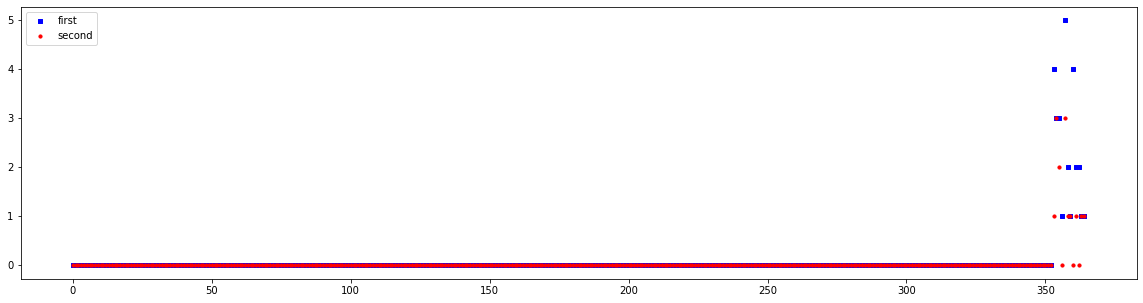

In [35]:
plot_2vec(102, 271)

## Compute distance matrix from similarity matrix for hierarchical clustering

In [12]:
dist_mat = 1-vec_angles

## Functions for hierarchical clustering

In [13]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))

In [14]:
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

In [15]:
# N = 8382
N = vec_angles.shape[0]

## Compute hierarchical clustering with 3 methods
- ward
- complete
- average

Method:	 ward


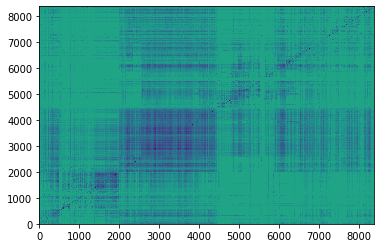

In [16]:
method = "ward"

print("Method:\t",method)

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)

plt.pcolormesh(ordered_dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Method:	 complete


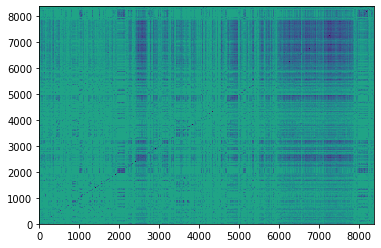

In [17]:
method = "complete"

print("Method:\t",method)

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)

plt.pcolormesh(ordered_dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

### The "average" method has the best clustering result

Method:	 average


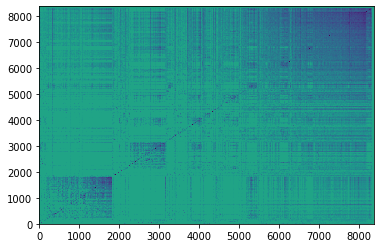

In [18]:
method = "average"


print("Method:\t",method)

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)

plt.pcolormesh(ordered_dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

## Compute Laplacian Matrix and plot its eigenvalues
Refernce: https://www.quora.com/Whats-the-intuition-behind-a-Laplacian-matrix-Im-not-so-much-interested-in-mathematical-details-or-technical-applications-Im-trying-to-grasp-what-a-laplacian-matrix-actually-represents-and-what-aspects-of-a-graph-it-makes-accessible

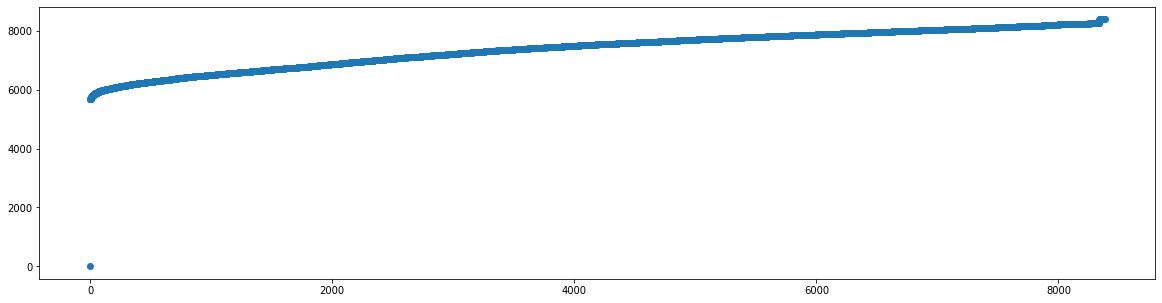

In [19]:
def Laplacian_EigVal(ordered_dist_mat):
    D = np.zeros((ordered_dist_mat.shape[0],ordered_dist_mat.shape[0]))
    for x in range(ordered_dist_mat.shape[0]):
        D[x,x] = np.sum(ordered_dist_mat[x])
    L = D-ordered_dist_mat
    # eigenvalues and eigenvectors
    vals, vecs = np.linalg.eig(L)

    # sort these based on the eigenvalues
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]
    x = np.array(range(8382))
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(111)
    ax1.scatter(x,vals)
    plt.show()
    return vecs, vals
vecs, vals = Laplacian_EigVal(ordered_dist_mat)

## Perform KMeans specifying n_clusters

In [20]:
from sklearn.cluster import KMeans
n_clusters = 8
init = np.transpose(vecs[:,:n_clusters])
kmeans = KMeans(n_clusters=n_clusters, init=init)
kmeans.fit(ordered_dist_mat)
colors = kmeans.labels_

/Users/hsureggie/coding/python/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


## Color ordered_dist_mat with cluster information

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


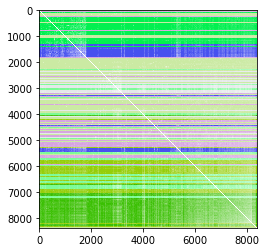

In [21]:
def Create_new_map(ordered_dist_mat, colors):
    new_map = []
    rand_colors = np.random.rand(20,3)
    count = 0
    for x in range(ordered_dist_mat.shape[0]):
    #     count += 1
    #     if count == 2:
    #         break
        group_color = rand_colors[colors[x]]
        group_color = np.repeat(group_color, ordered_dist_mat.shape[1]).reshape((3,ordered_dist_mat.shape[1])).T
        temp = np.reshape(ordered_dist_mat[x],(ordered_dist_mat[x].shape[0], 1))
        group_color = np.concatenate((group_color, temp), axis=1)
        new_map.append(group_color)
    new_map = np.array(new_map)
    plt.imshow(new_map)
    plt.show()
    return new_map

new_map = Create_new_map(ordered_dist_mat, colors)


In [23]:
%whos

Variable                  Type         Data/Info
------------------------------------------------
AgglomerativeClustering   type         <class 'sklearn.cluster.h<...>AgglomerativeClustering'>
Create_new_map            function     <function Create_new_map at 0x11e0c7950>
KMeans                    type         <class 'sklearn.cluster.k_means_.KMeans'>
Laplacian_EigVal          function     <function Laplacian_EigVal at 0x11d7b8200>
ListedColormap            type         <class 'matplotlib.colors.ListedColormap'>
N                         int          8382
colors                    ndarray      8382: 8382 elems, type `int32`, 33528 bytes
compute_serial_matrix     function     <function compute_serial_matrix at 0x11d476200>
data                      ndarray      8382x365: 3059430 elems, type `int64`, 24475440 bytes (23.341598510742188 Mb)
dist_mat                  ndarray      8382x8382: 70257924 elems, type `float64`, 562063392 bytes (536.0254211425781 Mb)
get_similars              func